<a id='intro'></a>
## Introduction

In this project I have selected the TMDb dataset. The dataset contains the data on movies and ratings in the United States.(source:IMDB/Kaggle)

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Acknowledgements
This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb. 

My Questions:

1. Observations of the runtimes, popularity and revenues variables.
2. The Top 10 directors for maximum number of movies released and popularity counts? 
3. Is there any(positive/negative) relation between  revenue and popularity ?

References:

IMDB/Kaggle

1.Google
2.Stackoverflow
3.Slack channel for Data analyst
4.Mentor
5.Udacity tutorials/quiz/videos

## Limitation

This dataset used is not absolute. It does not contain data about every release of every director in the world. The scope of this dataset is limited and as such the results are limited as well. 

All data in the dataset is considered to be valid. I have not verified the methods used to collect this data. My assumption is that the curated dataset is collected by fair means and not involved in any dispute.

In [93]:
# Use this cell to set up import statements for all of the packages that you need

# Remember to include a 'magic word' so that your visualizations are plotted

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### Dataset Observations 

This is a curated dataset. Column names are simple to understand. There are duplicate and missing entries.

Null values columns are as follows: 

1. imdb_id
2. cast
3. homepage
4. director
5. tagline
6. keywords
7. overview
8. genres
9. production_companies

Rows: 10866
Columns: 21


imdb_id is the unique identify. Only 10 of 10865 are missing.

This is very small number compared the total values, I have decided to drop of the null vales for this column.



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv', header =0)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
sum(df.duplicated())

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#Verify that duplicates are dropped

In [11]:
sum(df.duplicated())

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [13]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
#Data CLeaning. 

In [78]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Remove the null values from imdb_id column
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
id                      10856 non-null int64
imdb_id                 10856 non-null object
popularity              10856 non-null float64
budget                  10856 non-null int64
revenue                 10856 non-null int64
original_title          10856 non-null object
cast                    10780 non-null object
homepage                2934 non-null object
director                10816 non-null object
tagline                 8039 non-null object
keywords                9369 non-null object
overview                10853 non-null object
runtime                 10856 non-null int64
genres                  10835 non-null object
production_companies    9831 non-null object
release_date            10856 non-null object
vote_count              10856 non-null int64
vote_average            10856 non-null float64
release_year            10856 non-null int64
budget_adj              1

In [16]:
#Check the dataframe after dropping the ull values

In [15]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
#Save the dataframe to a new csv file.
df.to_csv('imdb_new.csv', index=False)

### Research Question 1 Observations of the runtimes, popularity and revenues variables

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

In [19]:
# Importing data from newly cleaned dataset
df_q1 = pd.read_csv('imdb_new.csv')
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [20]:
df1 = df_q1.groupby('release_year').mean()
df1.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07


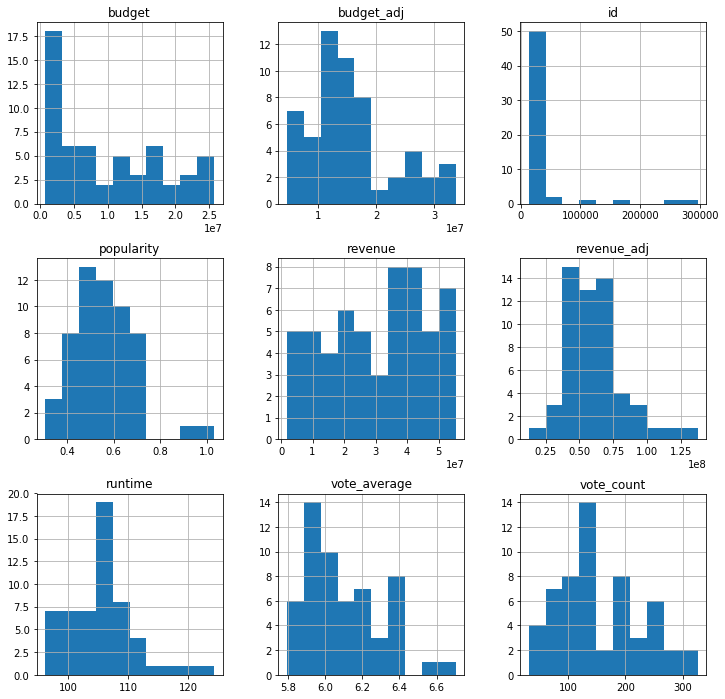

In [85]:
df1.hist(figsize=(12,12));

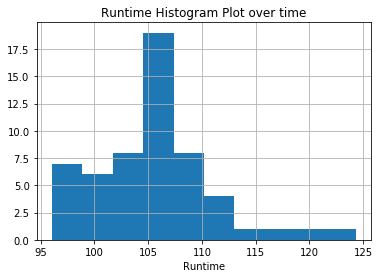

In [30]:
df1['runtime'].hist()
plt.xlabel('Runtime')
plt.title('Runtime Histogram Plot over time');

In [29]:
df1['runtime'].describe()

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

Observations: Runtime

From the  runtime plot, it appears that the average runtime over the years is about 105.714 minutes.
The distribution is skewed towards the right.


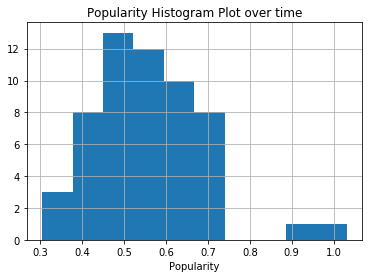

In [31]:
df1['popularity'].hist()
plt.xlabel('Popularity')
plt.title('Popularity Histogram Plot over time');

In [31]:
df1['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

In [43]:
df1['popularity'].median()

0.5469276318739791

Observations:Popularity

From the popularity plot, it appears that the average popularity rating is about .559
The median popularity value is about 0.5469

There are no data points for the .80 region. It is possible that no votes were given for that range or we have a dataset that doesnt contain these ratings.

The distribution is skewed towards the right.

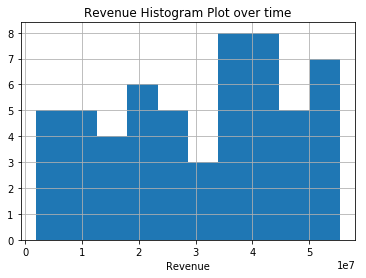

In [32]:
df1['revenue'].hist()
plt.xlabel('Revenue')
plt.title('Revenue Histogram Plot over time');

In [34]:
df1['revenue'].describe()

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

In [36]:
df1['revenue'].median()

32554972.321190476

Observations: Revenue

From the Revenue plot, it appears that the average popularity rating is about 3.076766e+07
The median value for revenue is 32554972.321190

The Revenuw histogram plot appears to be slightly skewed towards the left.

### Research Question 2  Top 10 directors for number of movies released.

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Top 10 directors with maximum number of movies released.

In [46]:
#Read the data file
df_q2 = pd.read_csv('imdb_new.csv')
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [48]:
#Clean the 'director' column by removing the null values.
df_q2.dropna(subset=['director'], inplace=True) 
df_q2.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
#verify that director column has no null value
df_q2.isnull().sum()

id                         0
imdb_id                    6
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      70
homepage                7895
director                   0
tagline                 2790
keywords                1465
overview                   3
runtime                    0
genres                    21
production_companies    1007
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [61]:
#count the values in 'Director' column

In [76]:
#Select only the top 10 directors
top_ten_dir = df_q2['director'].value_counts()
top_ten_dir.nlargest(10)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: director, dtype: int64

Observation: Top 10 Directors with maximum number of releases

According to the IMDB dataset, these are the top ten directors with maximum number of releases over time  

In [63]:
#Save the edited dataframe to a csv file
df_q2.to_csv('imdb_q2_info.csv', index=False)

In [64]:
#Read the new csv file to new dataframe for histogram plotting
df2 = pd.read_csv('imdb_q2_info.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10821 entries, 0 to 10820
Data columns (total 21 columns):
id                      10821 non-null int64
imdb_id                 10815 non-null object
popularity              10821 non-null float64
budget                  10821 non-null int64
revenue                 10821 non-null int64
original_title          10821 non-null object
cast                    10751 non-null object
homepage                2926 non-null object
director                10821 non-null object
tagline                 8031 non-null object
keywords                9356 non-null object
overview                10818 non-null object
runtime                 10821 non-null int64
genres                  10800 non-null object
production_companies    9814 non-null object
release_date            10821 non-null object
vote_count              10821 non-null int64
vote_average            10821 non-null float64
release_year            10821 non-null int64
budget_adj              1

In [70]:
df_dir = df2.groupby('director') 
df_dir_mean = df_dir.mean()
df_dir_mean

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
FrÃ©dÃ©ric Jardin,79070.000000,0.434506,2.500000e+06,3.358000e+03,98.000000,28.000000,5.900000,2011.000000,2.423495e+06,3.255239e+03
A. Todd Smith,370687.000000,1.876037,0.000000e+00,0.000000e+00,0.000000,11.000000,5.400000,2015.000000,0.000000e+00,0.000000e+00
A.R. Murugadoss,14070.000000,0.215030,9.100000e+06,7.600000e+07,183.000000,53.000000,6.900000,2008.000000,9.216358e+06,7.697178e+07
Aaron Aites,36124.000000,0.108700,0.000000e+00,0.000000e+00,93.000000,13.000000,6.500000,2008.000000,0.000000e+00,0.000000e+00
Aaron Blaise|Robert Walker,10009.000000,1.653031,1.000000e+08,2.500000e+02,85.000000,753.000000,6.800000,2003.000000,1.185353e+08,2.963382e+02
Aaron Hann|Mario Miscione,335866.000000,0.350599,0.000000e+00,0.000000e+00,87.000000,167.000000,6.100000,2015.000000,0.000000e+00,0.000000e+00
Aaron Harvey,75736.000000,1.212003,7.000000e+06,0.000000e+00,93.000000,71.000000,4.900000,2011.000000,6.785786e+06,0.000000e+00
Aaron Katz|Martha Stephens,252102.000000,0.267446,0.000000e+00,0.000000e+00,96.000000,17.000000,5.800000,2014.000000,0.000000e+00,0.000000e+00
Aaron Keeling|Austin Keeling,326247.000000,0.078363,0.000000e+00,0.000000e+00,111.000000,10.000000,3.800000,2015.000000,0.000000e+00,0.000000e+00


In [72]:
df_dir.median()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
FrÃ©dÃ©ric Jardin,79070.0,0.434506,2500000.0,3358.0,98.0,28.0,5.90,2011.0,2.423495e+06,3.255239e+03
A. Todd Smith,370687.0,1.876037,0.0,0.0,0.0,11.0,5.40,2015.0,0.000000e+00,0.000000e+00
A.R. Murugadoss,14070.0,0.215030,9100000.0,76000000.0,183.0,53.0,6.90,2008.0,9.216358e+06,7.697178e+07
Aaron Aites,36124.0,0.108700,0.0,0.0,93.0,13.0,6.50,2008.0,0.000000e+00,0.000000e+00
Aaron Blaise|Robert Walker,10009.0,1.653031,100000000.0,250.0,85.0,753.0,6.80,2003.0,1.185353e+08,2.963382e+02
Aaron Hann|Mario Miscione,335866.0,0.350599,0.0,0.0,87.0,167.0,6.10,2015.0,0.000000e+00,0.000000e+00
Aaron Harvey,75736.0,1.212003,7000000.0,0.0,93.0,71.0,4.90,2011.0,6.785786e+06,0.000000e+00
Aaron Katz|Martha Stephens,252102.0,0.267446,0.0,0.0,96.0,17.0,5.80,2014.0,0.000000e+00,0.000000e+00
Aaron Keeling|Austin Keeling,326247.0,0.078363,0.0,0.0,111.0,10.0,3.80,2015.0,0.000000e+00,0.000000e+00


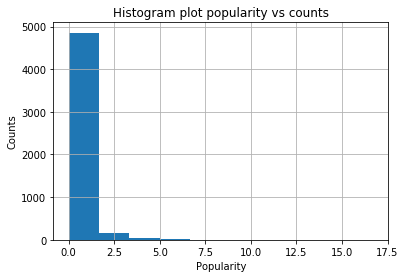

In [73]:
# Histogram plot popularity vs counts
df_dir_mean['popularity'].hist();
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Histogram plot popularity vs counts');

In [48]:
df_dir_mean['popularity'].describe()

count    5064.000000
mean        0.511897
std         0.694520
min         0.000973
25%         0.190121
50%         0.339477
75%         0.579055
max        16.696886
Name: popularity, dtype: float64

In [74]:
# Top 10 directors with maximum popularity ratings
df_dir_mean['popularity'].nlargest(10)

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Kyle Balda|Pierre Coffin        7.404165
Alan Taylor                     6.883129
Peter Richardson                6.668990
Pete Docter                     6.326804
Christopher Nolan               6.195521
Name: popularity, dtype: float64

Observation: top 10 directors with highest popularity count

According to the IMDB dataset the top 10 directors based on popularity counts.

The distribution appears to be scewed towards the right.

In [79]:
# runtimes based on directors based on a histogram plot. 

In [80]:
df_dir_mean['runtime'].describe()

count    5067.000000
mean       97.899040
std        33.472968
min         0.000000
25%        89.000000
50%        96.000000
75%       106.000000
max       900.000000
Name: runtime, dtype: float64

In [81]:
df_dir_mean['runtime'].median()

96.0

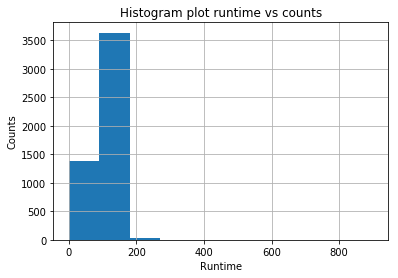

In [77]:
#Histogram plot runtime vs counts
df_dir_mean['runtime'].hist();
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Histogram plot runtime vs counts');

Observations: Runtime

The average runtime values is about 97.89
The mediam value for runtime is about 96.0

According to the histogram plot, distribution is skewed to the right.

### Research Question 3: Verify if there is any correlation between revenue and popularity

In [92]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

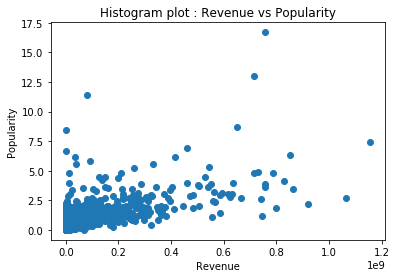

In [88]:
# plotting revenue and popularity, verify if there is any correlation.
plt.scatter(x=df_dir_mean['revenue'], y=df_dir_mean['popularity']);
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Histogram plot : Revenue vs Popularity');

Observations: Revenue and Popularity

From the Scatter plot between revenue and popularity, there seems to be a positive relation between both.

The density of data points for lower revenue is positively corelated with lower revenue. At higher popularity, the revenue is 
slightly related to popularity.

This is my understanding and interpretation for this scatter plot. 



## Conclusions

While working with this IMDB dataset, I  have come across some information regarding runtimes, revenues, popularity.

I also have more information regarding directors based on movies made and popularity.

Please note that this is my understanding and interpretation only. This analysis is not final.

1. From the runtime plot, it appears that the average runtime over the years is about 105.714 minutes. The distribution is skewed towards the right.

2. From the popularity plot, it appears that the average popularity rating is about .559 The median popularity value is about 0.5469

3. From the Revenue plot, it appears that the average popularity rating is about 3.076766e+07 The median value for revenue is 32554972.321190

4. Woody Allen with 45 movies released is the director with maximum movies released.

5. Colin Trevorrow with count of 16.696886 is the director with highest popularity

6. The density of data points for lower revenue is positively corelated with lower revenue. At higher popularity, the revenue is slightly related to popularity



### Thank you for viewing my project. Suggestions/comments are welcome. 